# <font color=Darkgreen>Loan Prediction

## <font color=purple>Filtering out the warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

## <font color=purple>Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## <font color=purple>Import data: training_set,testing_set
    
**Note:- Please change the reading directory of the dataset as per your requirement.**   
 
 
> - **training_set.csv, testing_set.csv** as current file name 

In [4]:
loan_train = pd.read_csv(r"C:\Users\gohel\OneDrive\Desktop\UpGrad\Clark University Contents\Courses Files\LINEAR REGRESS'N & TIME SERIES\Linear Regression Project\DataSet\training_set.csv")
loan_test = pd.read_csv(r"C:\Users\gohel\OneDrive\Desktop\UpGrad\Clark University Contents\Courses Files\LINEAR REGRESS'N & TIME SERIES\Linear Regression Project\DataSet\testing_set.csv")

In [5]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## <font color=purple>Understand the Data

In [7]:
# Check the number of rows and columns in the dataframe

loan_train.shape

(614, 13)

In [8]:
# Check the number of rows and columns in the dataframe

loan_test.shape

(367, 12)

In [9]:
# Checking the size of the dataframe

loan_train.size

7982

In [10]:
# Checking the size of the dataframe

loan_test.size

4404

In [11]:
# Checking data type of the dataframe

loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [12]:
# Checking data type of the dataframe

loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
# Changing the datatype in test dataset

loan_test.ApplicantIncome = loan_test.ApplicantIncome.astype(float)
loan_test.CoapplicantIncome = loan_test.CoapplicantIncome.astype(float)

In [14]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  property_Area      367 non-null    object 
dtypes: float64(5), object(7)
memory usage: 34.5+ KB


In [15]:
# Checking the summuary of the Numerical column in the dataframe

loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
# Checking the summuary of the Numerical column in the dataframe

loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [17]:
# Checking unique values in the dataframe

loan_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
property_Area          3
Loan_Status            2
dtype: int64

In [18]:
# Checking unique values in the dataframe

loan_test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
property_Area          3
dtype: int64

In [19]:
# Creating a copy of dataset for checking the duplicate values in dataframe

loan_train_copy = loan_train.copy()

In [20]:
## Dropping the duplicate values from the copies dataset

loan_train_copy.drop_duplicates(inplace = True)

In [21]:
loan_train_copy.shape

(614, 13)

In [22]:
loan_train.shape

(614, 13)

In [23]:
loan_test_copy = loan_test.copy()
loan_test_copy.drop_duplicates(inplace = True)

In [24]:
loan_test_copy.shape

(367, 12)

In [25]:
loan_test.shape

(367, 12)

- **The Shape of the copied data frame is the same as the original data frame. So we can conclude that there are no duplicate values in the dataset.**

## <font color=purple>Data Cleaning

In [26]:
# Finding the null values in the dataset

loan_train.isnull().sum()/len(loan_train)*100

Loan_ID              0.000000
Gender               2.442997
Married              0.488599
Dependents           2.442997
Education            0.162866
Self_Employed        5.211726
ApplicantIncome      0.325733
CoapplicantIncome    0.162866
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<AxesSubplot:>

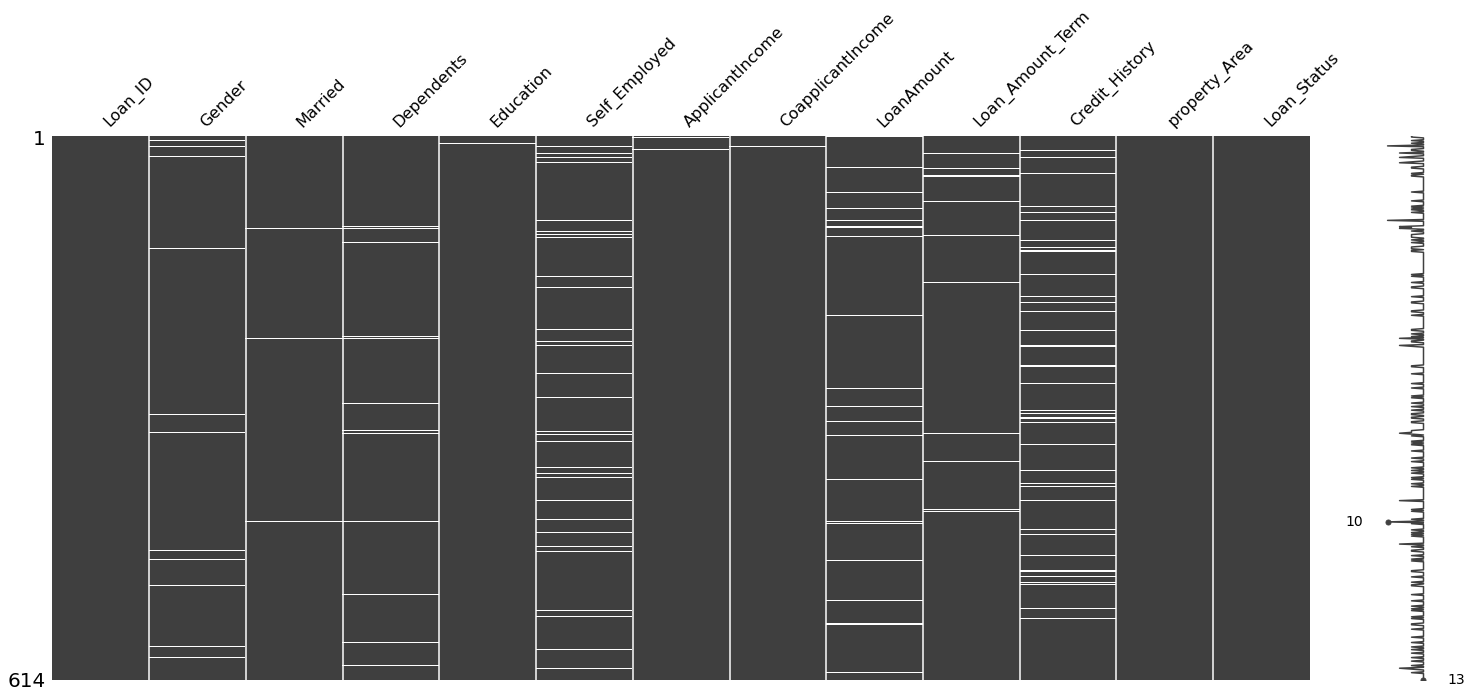

In [27]:
msno.matrix(loan_train)
plt.show()

In [28]:
# Finding the null values in the dataset

loan_test.isnull().sum()/len(loan_test)*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
property_Area        0.000000
dtype: float64

<AxesSubplot:>

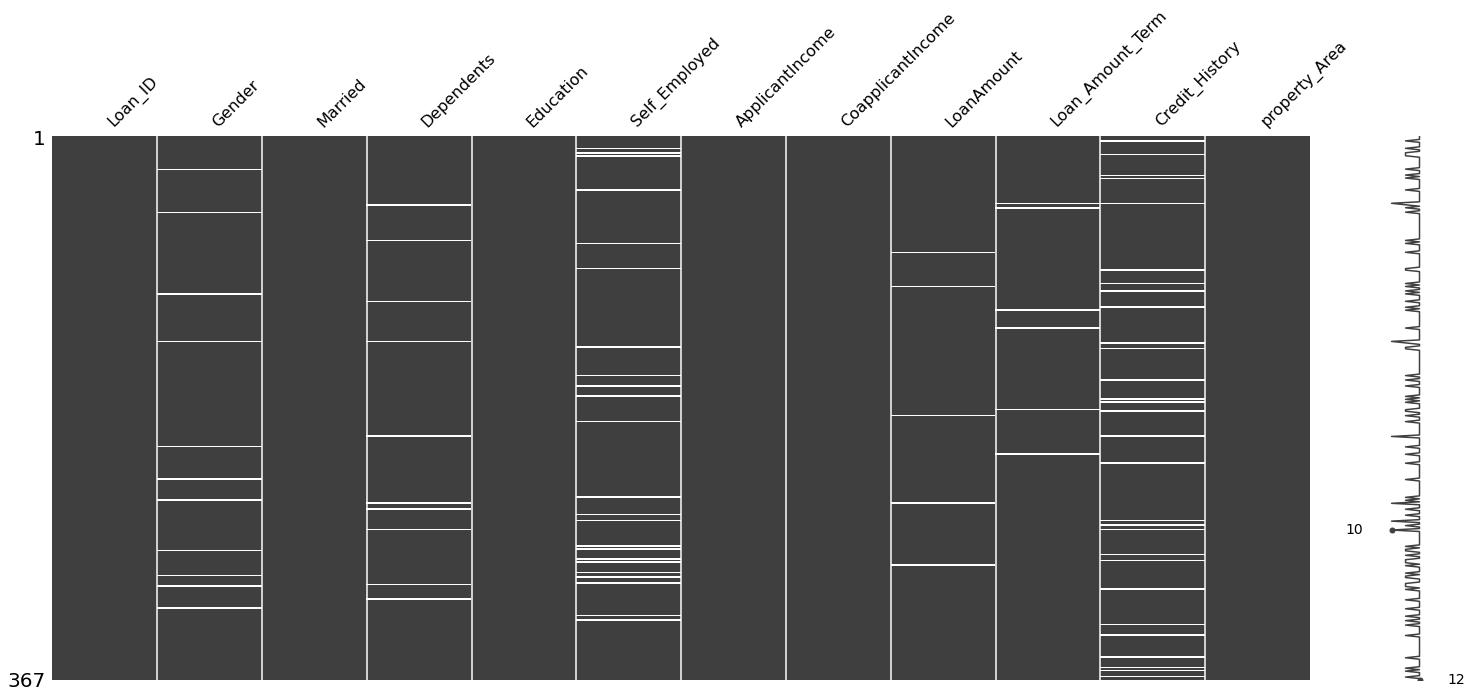

In [29]:
msno.matrix(loan_test)
plt.show()

In [30]:
# Imputing the Null values with the mean, mode and median

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Education'].fillna(loan_train['Education'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['ApplicantIncome'].fillna(loan_train['ApplicantIncome'].median(), inplace=True)
loan_train['CoapplicantIncome'].fillna(loan_train['CoapplicantIncome'].median(), inplace=True)
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(), inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

In [31]:
loan_train.isnull().sum()/len(loan_train)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
property_Area        0.0
Loan_Status          0.0
dtype: float64

In [32]:
len(loan_train.columns)

13

In [33]:
loan_train_new = loan_train

In [34]:
loan_test.isnull().sum()/len(loan_test)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
property_Area        0.0
dtype: float64

<AxesSubplot:>

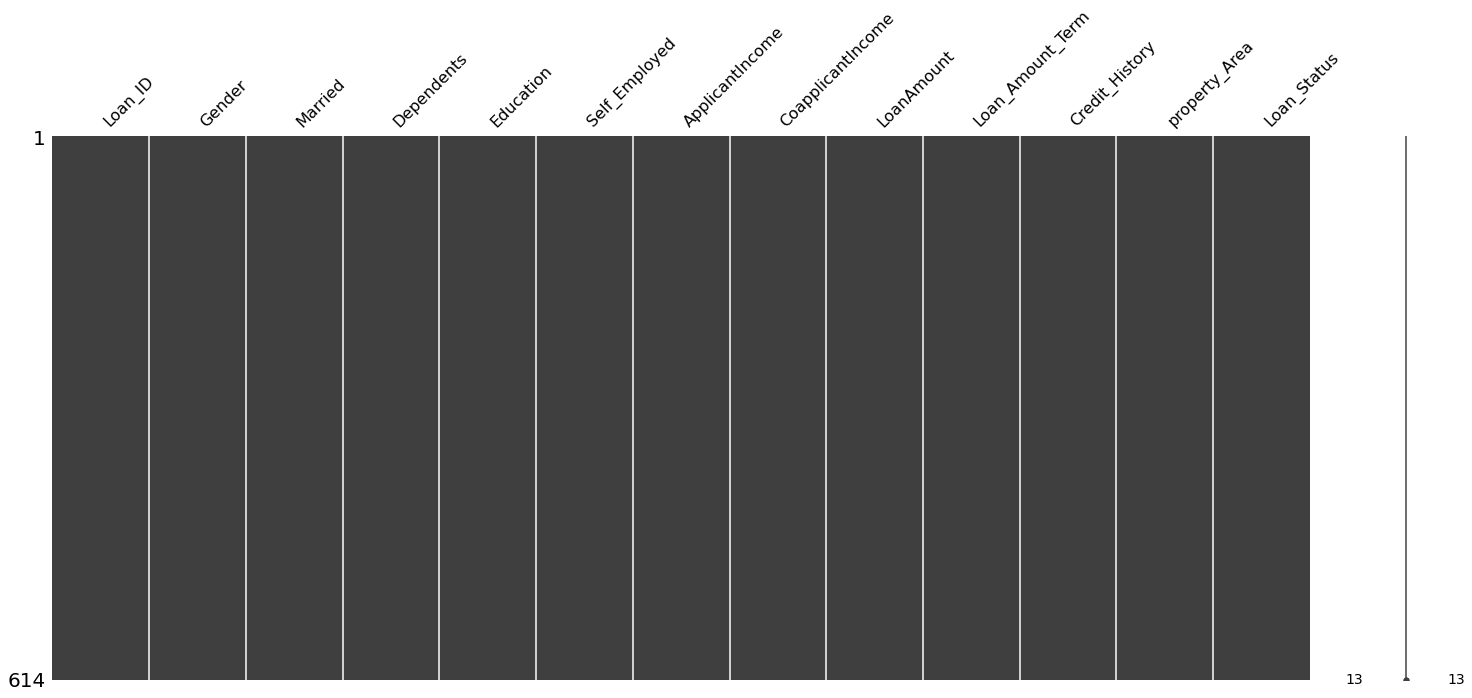

In [35]:
msno.matrix(loan_train)
plt.show()

<AxesSubplot:>

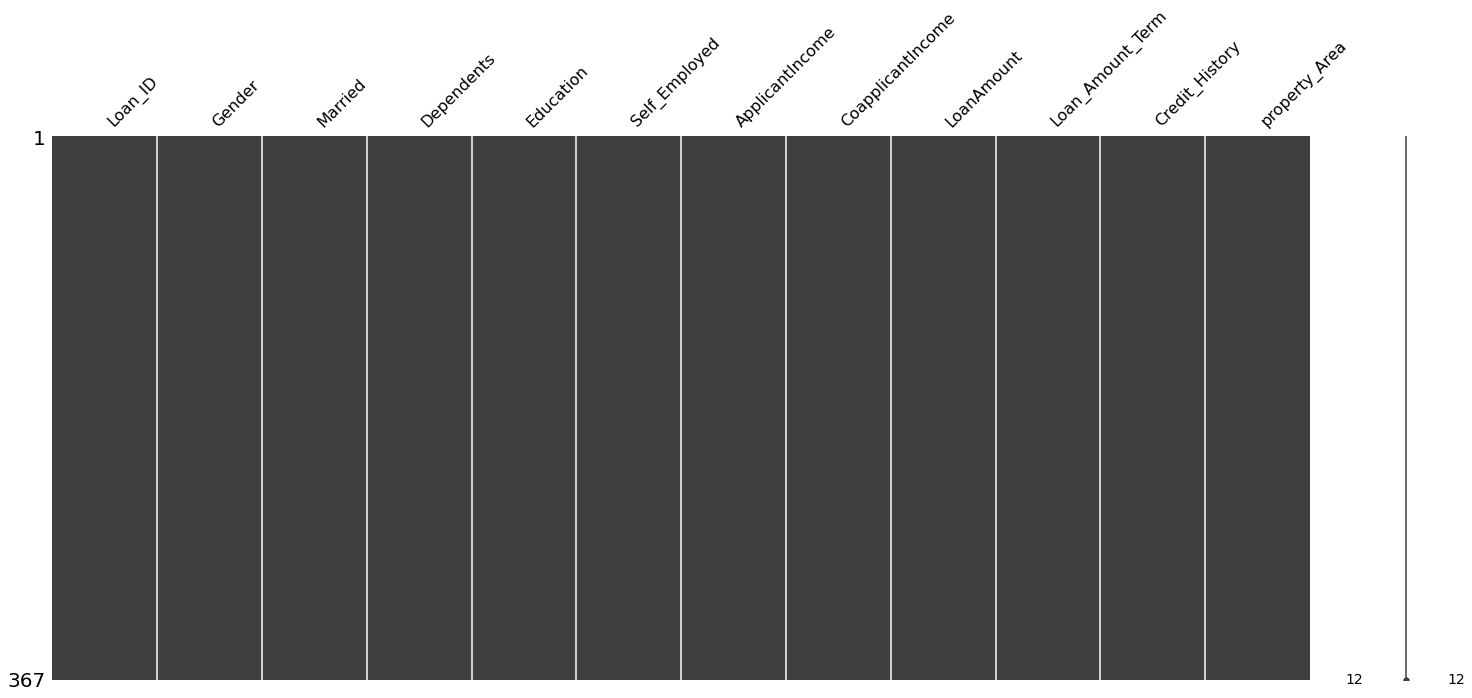

In [36]:
msno.matrix(loan_test)
plt.show()

<Figure size 1296x1584 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='ApplicantIncome'>

Text(0.5, 1.0, 'ApplicantIncome')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='CoapplicantIncome'>

Text(0.5, 1.0, 'CoapplicantIncome')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='LoanAmount'>

Text(0.5, 1.0, 'LoanAmount')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='Loan_Amount_Term'>

Text(0.5, 1.0, 'Loan_Amount_Term')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='Credit_History'>

Text(0.5, 1.0, 'Credit_History')

Text(0, 0.5, '')

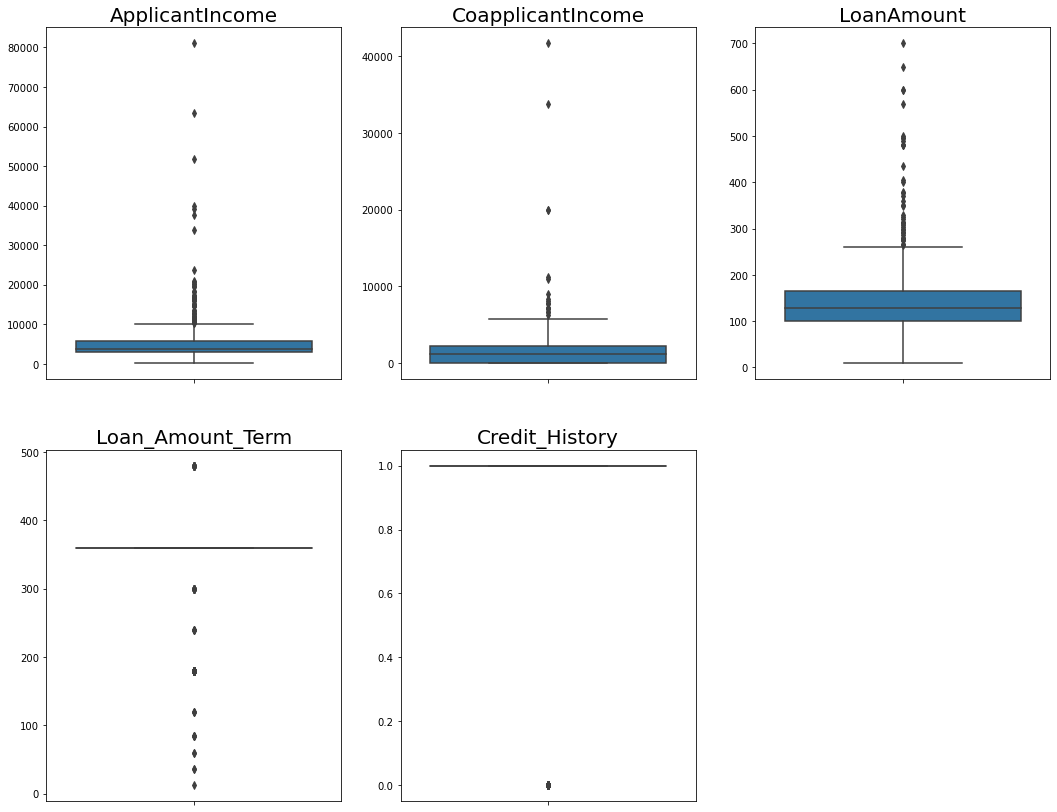

In [37]:
# Finding the outliers in the dataset

plt.figure(figsize=(18,22))
current_df_outlier= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in enumerate(current_df_outlier):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(y=loan_train[i[1]])
    plt.title(i[1],fontsize=20)
    plt.ylabel('')

In [38]:
loan_train['ApplicantIncome'] = loan_train['ApplicantIncome'][(loan_train['ApplicantIncome'] < 20000)]
loan_train['CoapplicantIncome'] = loan_train['CoapplicantIncome'][(loan_train['CoapplicantIncome'] < 12500)]

<Figure size 1296x1584 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='ApplicantIncome'>

Text(0.5, 1.0, 'ApplicantIncome')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='CoapplicantIncome'>

Text(0.5, 1.0, 'CoapplicantIncome')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='LoanAmount'>

Text(0.5, 1.0, 'LoanAmount')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='Loan_Amount_Term'>

Text(0.5, 1.0, 'Loan_Amount_Term')

Text(0, 0.5, '')

<AxesSubplot:>

<AxesSubplot:ylabel='Credit_History'>

Text(0.5, 1.0, 'Credit_History')

Text(0, 0.5, '')

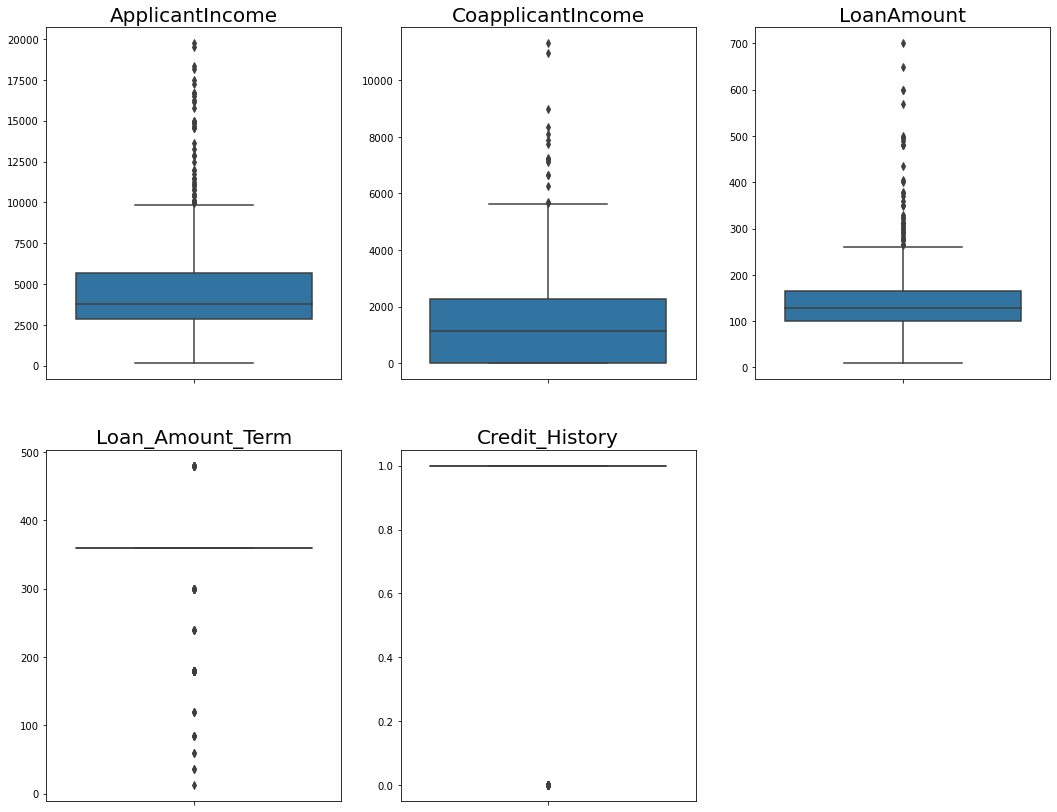

In [39]:
# Finding the outliers in the dataset

plt.figure(figsize=(18,22))
current_df_outlier= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in enumerate(current_df_outlier):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(y=loan_train[i[1]])
    plt.title(i[1],fontsize=20)
    plt.ylabel('')

In [40]:
loan_train['ApplicantIncome'].fillna(loan_train['ApplicantIncome'].median(), inplace=True)
loan_train['CoapplicantIncome'].fillna(loan_train['CoapplicantIncome'].median(), inplace=True)

## <font color=purple>Exploratory Data Analysis

<AxesSubplot:title={'center':'Loan Status'}>

Y    422
N    192
Name: Loan_Status, dtype: int64

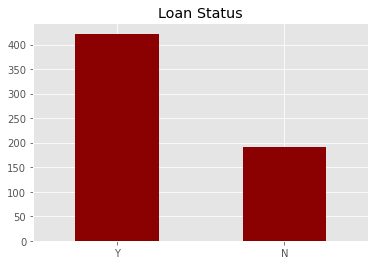

In [41]:
# Plotting the Loan Status Value Count

plt.style.use('ggplot')
loan_train['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0, color='darkred')
display(loan_train['Loan_Status'].value_counts())

<Figure size 864x432 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Gender', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Married', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Dependents', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Education', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='property_Area', ylabel='count'>

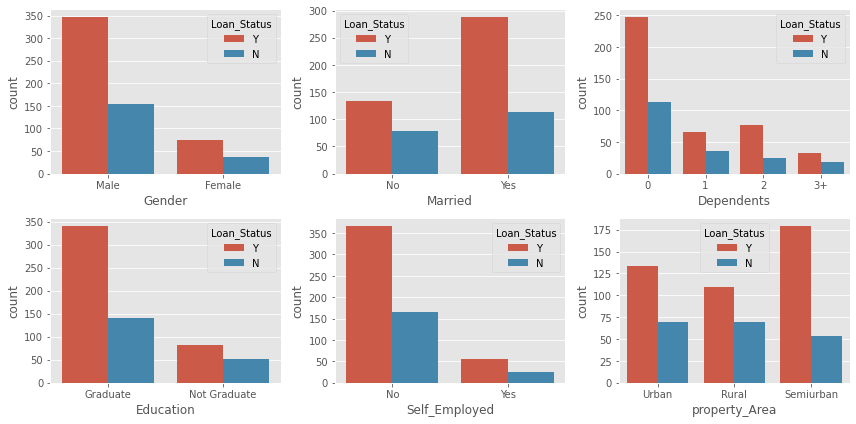

In [42]:
# Plotting the Count Plot of Categorical Columns

countplot_list = ["Gender","Married","Dependents","Education","Self_Employed","property_Area"]
plt.figure(figsize=(12,6))
x=1
for i in countplot_list:
    plt.subplot(2,3,x)
    sns.countplot(x=i,hue='Loan_Status',data=loan_train)
    x = x + 1
plt.tight_layout()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

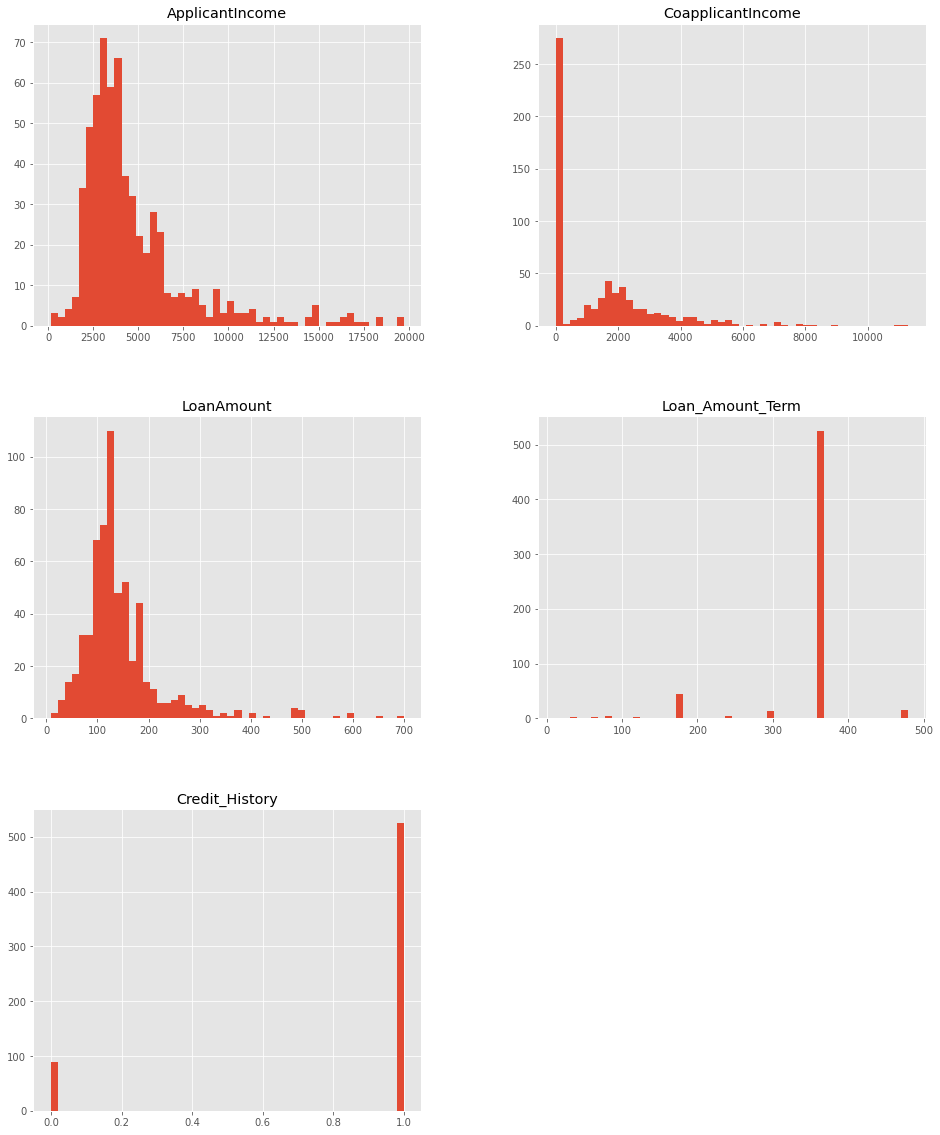

In [43]:
# Plotting the Histogram for Numerical Columns

loan_train.hist(figsize=(16,20), bins=50)

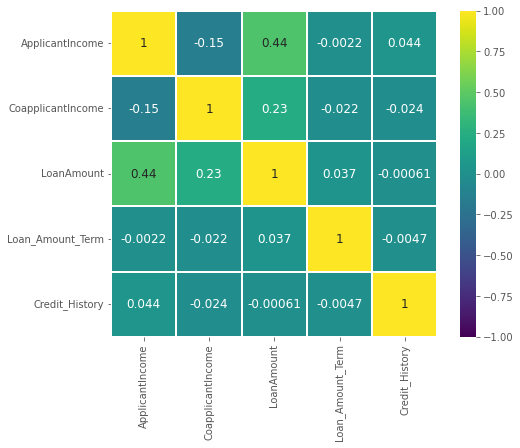

In [44]:
# Finding a correlation between Numerical Columns

corr = loan_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 12}, square=True);

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

Text(0.5, 1.0, 'Relationship between ApplicantIncome and LoanAmount')

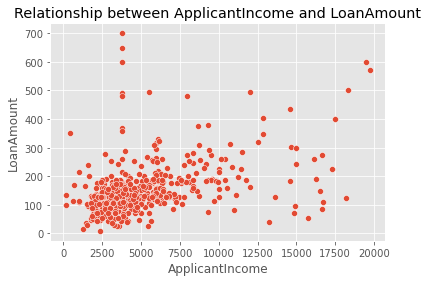

In [45]:
# Plotting a Scatter Plot between ApplicantIncome and LoanAmount

sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=loan_train)
plt.title("Relationship between ApplicantIncome and LoanAmount")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

<AxesSubplot:xlabel='Married', ylabel='ApplicantIncome'>

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

Text(0.5, 1.0, 'Applicant Income vs Gender')

Text(0.5, 1.0, 'Loan Amount vs Gender')

Text(0.5, 1.0, 'Applicant Income vs Married')

Text(0.5, 1.0, 'Loan Amount vs Married')

Text(0.5, 1.0, 'Applicant Income vs Dependents')

Text(0.5, 1.0, 'Loan Amount vs Dependents')

Text(0.5, 1.0, 'Applicant Income vs Education')

Text(0.5, 1.0, 'Loan Amount vs Education')

Text(0.5, 1.0, 'Applicant Income vs Self_Employed')

Text(0.5, 1.0, 'Loan Amount vs Self_Employed')

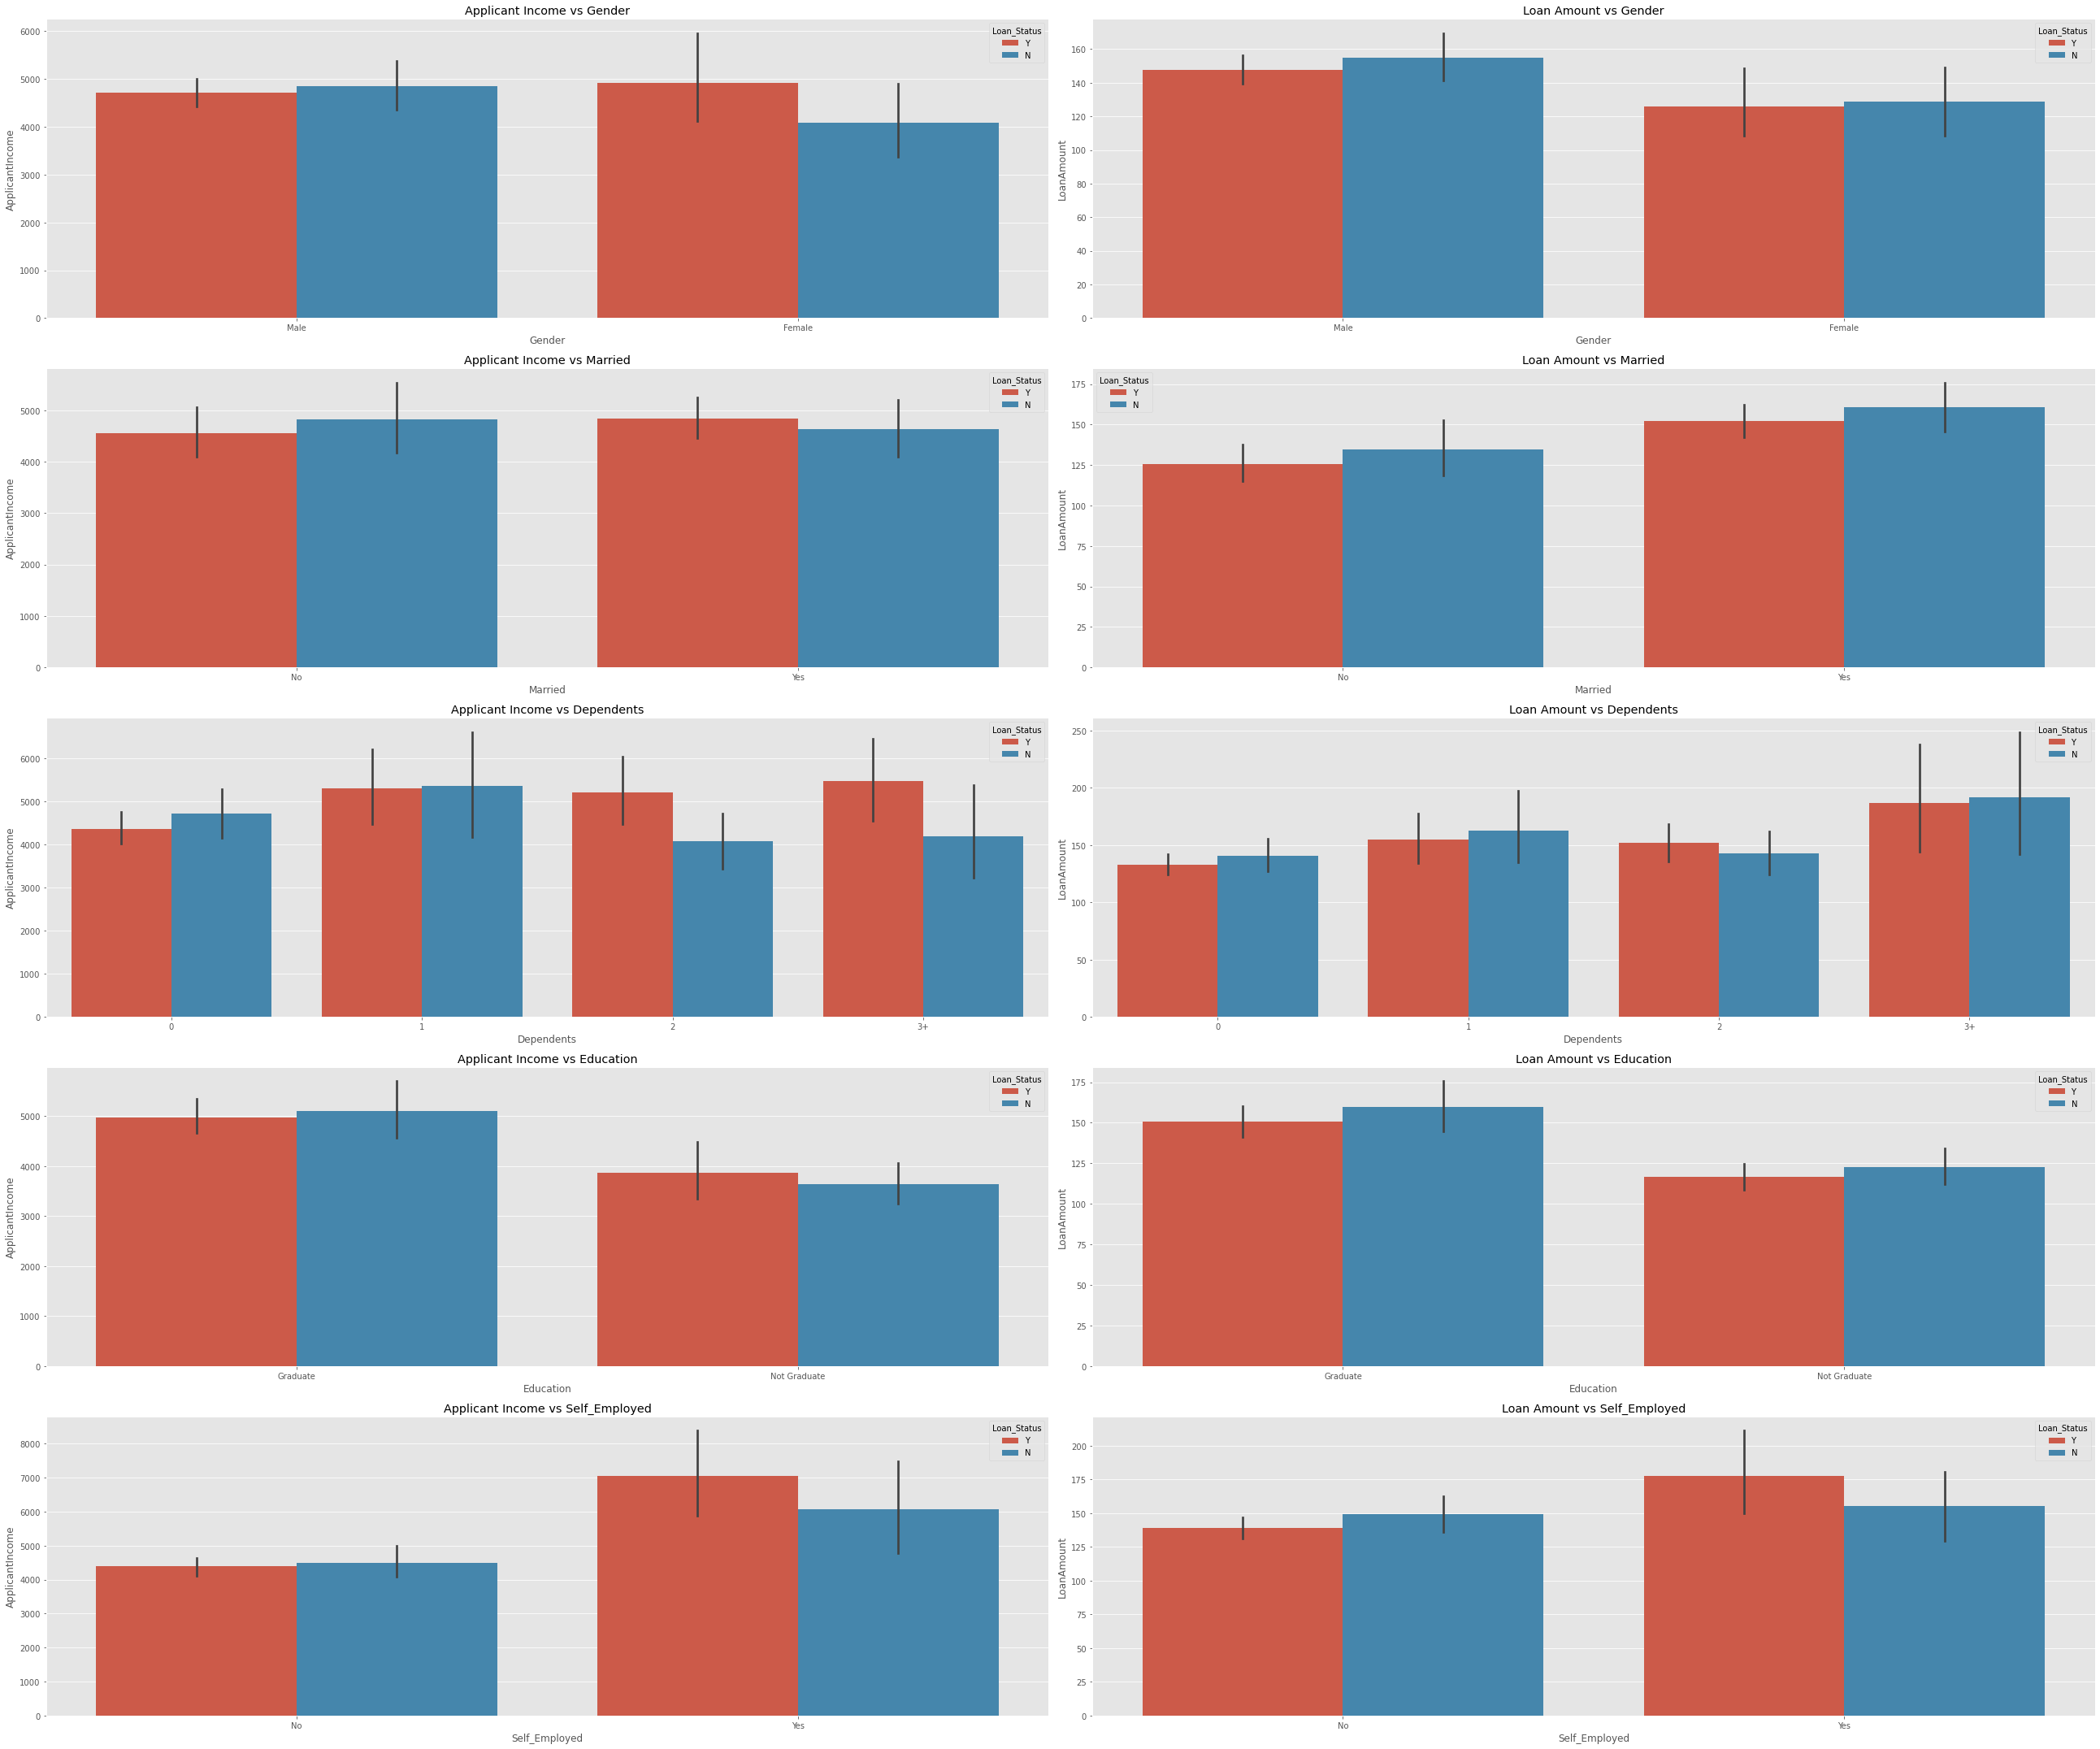

In [46]:
# Plotting graph with Multiple Features

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(36, 30))


sns.barplot(data=loan_train, x="Gender", y="ApplicantIncome", hue="Loan_Status", ax=ax[0, 0])
sns.barplot(data=loan_train, x="Gender", y="LoanAmount", hue="Loan_Status", ax=ax[0, 1])
sns.barplot(data=loan_train, x="Married", y="ApplicantIncome", hue="Loan_Status", ax=ax[1, 0])
sns.barplot(data=loan_train, x="Married", y="LoanAmount", hue="Loan_Status", ax=ax[1, 1])
sns.barplot(data=loan_train, x="Dependents", y="ApplicantIncome", hue="Loan_Status", ax=ax[2, 0])
sns.barplot(data=loan_train, x="Dependents", y="LoanAmount", hue="Loan_Status", ax=ax[2, 1])
sns.barplot(data=loan_train, x="Education", y="ApplicantIncome", hue="Loan_Status", ax=ax[3, 0])
sns.barplot(data=loan_train, x="Education", y="LoanAmount", hue="Loan_Status", ax=ax[3, 1])
sns.barplot(data=loan_train, x="Self_Employed", y="ApplicantIncome", hue="Loan_Status", ax=ax[4, 0])
sns.barplot(data=loan_train, x="Self_Employed", y="LoanAmount", hue="Loan_Status", ax=ax[4, 1])


ax[0, 0].set_title("Applicant Income vs Gender")
ax[0, 1].set_title("Loan Amount vs Gender")
ax[1, 0].set_title("Applicant Income vs Married")
ax[1, 1].set_title("Loan Amount vs Married")
ax[2, 0].set_title("Applicant Income vs Dependents")
ax[2, 1].set_title("Loan Amount vs Dependents")
ax[3, 0].set_title("Applicant Income vs Education")
ax[3, 1].set_title("Loan Amount vs Education")
ax[4, 0].set_title("Applicant Income vs Self_Employed")
ax[4, 1].set_title("Loan Amount vs Self_Employed")

plt.tight_layout()
plt.show()

In [47]:
loan_train = loan_train.drop('Loan_ID',axis=1)

loan_train['Dependents'].replace('3+',3,inplace=True)
loan_train['Loan_Status'].replace('N',0, inplace=True)
loan_train['Loan_Status'].replace('Y',1,inplace=True)

In [48]:
matrix= loan_train.corr() 
print(loan_train.head())
Catos = ['Gender','Married','Dependents','Education','Self_Employed','property_Area']
for cato in Catos:
    loan_train[cato] = loan_train[cato].astype('category').cat.codes

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No           5849.0   
1   Male     Yes          1      Graduate            No           3806.0   
2   Male     Yes          0      Graduate           Yes           3000.0   
3   Male     Yes          0  Not Graduate            No           2583.0   
4   Male      No          0      Graduate            No           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  property_Area  Loan_Status  
0         Urban            1  
1         Rural            0  
2         Urban            1 

# <font color=Blue> Research Questions

### <font color=DarkBlue> --->  What are the most important factors that determine a customer's loan eligibility?

In [49]:
y = loan_train.Loan_Status
loan_train_v1 = loan_train.drop("Loan_Status",1)

In [50]:
loan_train_v1 = pd.get_dummies(loan_train_v1)
loan_train = pd.get_dummies(loan_train)

In [51]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.Logit(y,loan_train_v1)
result=model1.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.475921
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                           10
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.2339
Time:                        20:02:03   Log-Likelihood:                -292.22
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 4.891e-33
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.3248      0.286     -1.136      0.256      -0.885       0.236
Married 

In [52]:
coefficients = result.params

# Calculate the odds ratio for each variable
odds_ratio = np.exp(coefficients)

# Print the odds ratio for each variable
for i in range(len(odds_ratio)):
    print(f'Odds Ratio for variable {loan_train.columns[i]}: {odds_ratio[i]}')

Odds Ratio for variable Gender: 0.7226605918507025
Odds Ratio for variable Married: 1.689722212232862
Odds Ratio for variable Dependents: 0.9719279281771034
Odds Ratio for variable Education: 0.5887124838414842
Odds Ratio for variable Self_Employed: 1.0184819866420558
Odds Ratio for variable ApplicantIncome: 0.9999840971565046
Odds Ratio for variable CoapplicantIncome: 1.0000210315721583
Odds Ratio for variable LoanAmount: 0.9978011064906426
Odds Ratio for variable Loan_Amount_Term: 0.9952942497772078
Odds Ratio for variable Credit_History: 31.27660836350969
Odds Ratio for variable property_Area: 0.9967206933551697


## 	To determine whether a customer is eligible for a loan, check their eligibility?

In [53]:
#storing train data in train_df_1 and storing test data in test_df_1 for problem statement 1:-
train_df_1 = loan_train_new
test_df_1 = loan_test

In [54]:
train_df_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
test_df_1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area'],
      dtype='object')

In [56]:
#Adding Applicant income and coapplicant income to make total income
train_df_1["TotalIncome"] = train_df_1["ApplicantIncome"] + train_df_1["CoapplicantIncome"]
test_df_1["TotalIncome"] = test_df_1["ApplicantIncome"] + test_df_1["CoapplicantIncome"]

#And then, Dropping Applicant income and coapplicant income 
train_df_1 = train_df_1.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)
test_df_1 = test_df_1.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)

In [57]:
train_df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,5314.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [58]:
len(train_df_1.columns)

12

In [59]:
test_df_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720.0
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576.0
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800.0
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,1.0,Urban,4886.0
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,3276.0


In [60]:
len(test_df_1.columns)

11

In [61]:
#X and Y has been defined using training data
#P has been defined using testing data
Y = train_df_1[["Loan_Status"]]
X = train_df_1.drop(["Loan_Status","Loan_ID"],axis=1)
P = test_df_1.drop(["Loan_ID"],axis=1)

In [62]:
#One hot encoding for categorical columns in X & categorical column in P
Xnew = pd.get_dummies(X)
Pnew = pd.get_dummies(P)

In [63]:
len(Xnew.columns)

19

In [64]:
len(Pnew.columns)

19

## Division of training data in training and testing set

In [65]:
# now standardiszation is done on training and testing data
# now we have to use standardised training data for building model(only Xnew and Y)
# standardised testing data will be used further for predictions after building above model(Pnew to be used)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=101)

## Model 1 :- Logistic Regression

Training Accuracy is:- 79.02 %
Testing Accuracy is:- 75.61 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           N       0.74      0.51      0.61        45
           Y       0.76      0.90      0.82        78

    accuracy                           0.76       123
   macro avg       0.75      0.70      0.71       123
weighted avg       0.75      0.76      0.74       123
 

Confusin Matrix for xtest data:-



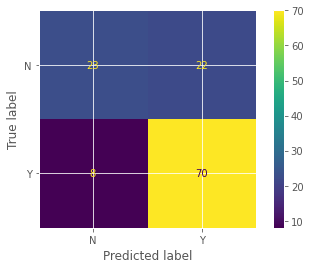

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101)
lr_model = lr.fit(xtrain,ytrain)
tr_pred_lr = lr_model.predict(xtrain)
ts_pred_lr = lr_model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_lr = round(accuracy_score(ytrain,tr_pred_lr),4)
ts_acc_lr = round(accuracy_score(ytest,ts_pred_lr),4)
print("Training Accuracy is:-",round(tr_acc_lr*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_lr*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(ytest,ts_pred_lr),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(lr_model,xtest,ytest))

## Model 2:- Random Forest Classifier

Training Accuracy is:- 100.0 %
Testing Accuracy is:- 76.42 %
Classification report for xtest data:-

               precision    recall  f1-score   support

           N       0.79      0.49      0.60        45
           Y       0.76      0.92      0.83        78

    accuracy                           0.76       123
   macro avg       0.77      0.71      0.72       123
weighted avg       0.77      0.76      0.75       123
 

Confusin Matrix for xtest data:-



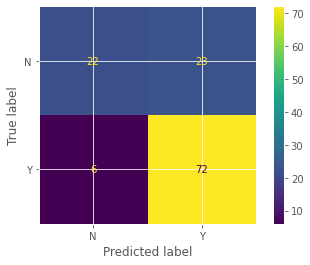

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)
rfc_model = rfc.fit(xtrain,ytrain)
tr_pred_rfc = rfc_model.predict(xtrain)
ts_pred_rfc = rfc_model.predict(xtest)
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
tr_acc_rfc = round(accuracy_score(ytrain,tr_pred_rfc),4)
ts_acc_rfc = round(accuracy_score(ytest,ts_pred_rfc),4)
print("Training Accuracy is:-",round(tr_acc_rfc*100,2),"%")
print("===================================================")
print("Testing Accuracy is:-",round(ts_acc_rfc*100,2),"%")
print("===================================================")
print("Classification report for xtest data:-\n\n",classification_report(ytest,ts_pred_rfc),"\n")
print("===================================================")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(rfc_model,xtest,ytest))

## Final Model consideration will be random forest as per accuracy

## Final Grid Search CV model

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

tg = {'max_depth':range(2,10),
     'min_samples_split':range(2,5),
     'min_samples_leaf':range(2,6)}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=9)
cvmodel = cv.fit(Xnew,Y)
round(cvmodel.best_score_,4)

0.816

In [69]:
# Best parameters obtained from GridSearchCV model
cvmodel.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

## Final Random Forest Classification model using above best parameter grid and passing whole training data

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101,max_depth=7,min_samples_leaf=4,min_samples_split=2)
rfc_model_final = rfc.fit(Xnew,Y)

## Final Predictions

In [71]:
loan_status = pd.DataFrame(rfc_model_final.predict(Pnew),columns=["Loan_Status"])
submission = test_df_1.join(loan_status)[["Loan_ID","Loan_Status"]]
#submission.to_csv("submission1_w4.csv")

In [72]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


# Research Question 2:For customers who are not eligible for the required loan amount and duration, what is the maximum amount they can borrow for the given duration?

In [73]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model with best hyperparameters
lr = LogisticRegression(random_state=101, C=0.1, max_iter=1000)

# Fit the model to the entire training data
lr_model_final = lr.fit(Xnew, Y)

# Make predictions on the test data
loan_status = pd.DataFrame(lr_model_final.predict(Pnew), columns=["Loan_Status"])
submission = test_df_1.join(loan_status)[["Loan_ID","Loan_Status"]]
#submission.to_csv("submission1_w4.csv")


In [74]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [75]:
#train_df_1 = loan_train_new
#test_df_1 = loan_test

In [76]:
#**Problem Statement 2 A:- If customer is not eligible for the input required amount:**
#** what can be amount for the given duration.(Regression)**
train_df_2 = loan_train_new[loan_train_new.Loan_Status=="Y"]
# train_df_2 contains data whose loan has been sanctioned (from main training data)

In [77]:
test_df_2 = loan_test.join(loan_status)
test_df_2 = test_df_2[test_df_2.Loan_Status == 'N']
# test_df_2 contains data whose loan has been rejected (on testing data for which we have done predictions in problem 1)

In [78]:
train_df_2.shape


(422, 14)

In [79]:
test_df_2.shape

(56, 14)

In [80]:
train_df_2.columns
test_df_2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'TotalIncome',
       'Loan_Status'],
      dtype='object')

In [81]:
#Reindexing as we have been sorted the data based on some condition(Yes from training and No from testing using prediction)
train_df_2.index = range(0,train_df_2.shape[0])
test_df_2.index = range(0,test_df_2.shape[0])

In [82]:
train_df_2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [83]:
test_df_2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,TotalIncome,Loan_Status
0,LP001056,Male,Yes,2,Not Graduate,No,3881.0,0.0,147.0,360.0,0.0,Rural,3881.0,N
1,LP001094,Male,Yes,2,Graduate,No,12173.0,0.0,166.0,360.0,0.0,Semiurban,12173.0,N
2,LP001153,Male,No,0,Graduate,No,0.0,24000.0,148.0,360.0,0.0,Rural,24000.0,N
3,LP001203,Male,No,0,Graduate,No,3150.0,0.0,176.0,360.0,0.0,Semiurban,3150.0,N
4,LP001313,Male,No,0,Graduate,No,2750.0,0.0,130.0,360.0,0.0,Urban,2750.0,N


In [84]:
#Dropping of columns
train_df_2_f = train_df_2.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Status"],axis=1)
test_df_2_f = test_df_2.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Status"],axis=1)

In [85]:
train_df_2_f.shape

(422, 10)

In [86]:
test_df_2.shape

(56, 14)

In [87]:
# Define X and Y
#X and Y has been defined using training data
#P has been defined using testing data
Y = train_df_2_f[["LoanAmount"]]
X = train_df_2_f.drop(["LoanAmount"],axis=1)
P = test_df_2_f

In [88]:
#categorical and continuous column separation from X
cat1 = []
con1 = []
for i in X.columns:
    if X[i].dtypes == 'object':
        cat1.append(i)
    else:
        con1.append(i)
        
#categorical and continuous column separation from P
cat2 = []
con2 = []
for i in P.columns:
    if P[i].dtypes == 'object':
        cat2.append(i)
    else:
        con2.append(i)

In [89]:
# One Hot Encoding:- 
#One hot encoding for categorical columns in X and P
X1 = pd.get_dummies(X[cat1])
P1 = pd.get_dummies(P[cat2])

In [90]:
len(X1.columns)
len(P1.columns)
# There is no differnce of columns in P1 compared to X1

15

15

In [91]:
X1.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'property_Area_Rural', 'property_Area_Semiurban',
       'property_Area_Urban'],
      dtype='object')

In [92]:
P1.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'property_Area_Rural', 'property_Area_Semiurban',
       'property_Area_Urban'],
      dtype='object')

In [93]:
# Pre-Processing
# Standardisation of continous column data in X
# Standardisation of continous column data in P using same variance and standard deviation
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[con1]),columns=con1)
P2 = pd.DataFrame(ss.transform(P[con2]),columns=con2)

In [94]:
X2.head()

,Loan_Amount_Term,Credit_History,TotalIncome
0,0.296516,0.129875,-0.112869
1,0.296516,0.129875,-1.010058
2,0.296516,0.129875,-0.398810
3,0.296516,0.129875,-0.065317
4,0.296516,0.129875,1.072467


In [95]:
#Joining of categorical features (after one hot encoding) with continuos features (after standardisation)
Xnew = X1.join(X2)
Pnew = P1.join(P2)

In [96]:
Xnew.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Loan_Amount_Term,Credit_History,TotalIncome
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.296516,0.129875,-0.112869
1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0.296516,0.129875,-1.010058
2,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0.296516,0.129875,-0.398810
3,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.296516,0.129875,-0.065317
4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0.296516,0.129875,1.072467


In [97]:
Xnew.shape

(422, 18)

In [98]:
Pnew.shape

(56, 18)

In [99]:
Pnew.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Loan_Amount_Term,Credit_History,TotalIncome
0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0.296516,-7.699722,-0.732619
1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0.296516,-7.699722,1.878646
2,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0.296516,-7.699722,5.603129
3,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0.296516,-7.699722,-0.962820
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0.296516,-7.699722,-1.088786


In [100]:
Y.head()

,LoanAmount
0,128.0
1,66.0
2,120.0
3,141.0
4,267.0


In [101]:
# Replace NaN values with the median of Y
#Y = Y.fillna(Y.median())

# now standardiszation is done on training and testing data
# now we have to use standardised training data for building model(only Xnew and Y)
# standardised testing data will be used further for predictions after building above model(Pnew to be used)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=101)




In [102]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=101)
log_reg_model = log_reg.fit(xtrain, ytrain)
tr_pred_log_reg = log_reg_model.predict(xtrain)
ts_pred_log_reg = log_reg_model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_error_log_reg_1 = round(mean_squared_error(ytrain, tr_pred_log_reg), 2)
ts_error_log_reg_1 = round(mean_squared_error(ytest, ts_pred_log_reg), 2)

print("Training error is:", tr_error_log_reg_1)
print("Testing error is:", ts_error_log_reg_1)

Training error is: 4828.68
Testing error is: 8654.84


In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Evaluate the model performance
accuracy = accuracy_score(ytest, ts_pred_log_reg)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(ytest, ts_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(ytest, ts_pred_log_reg)
print("Classification Report:\n", class_report)


Accuracy: 0.023529411764705882
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        17.0       0.00      0.00      0.00         0
        25.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         0
        55.0       0.00      0.00      0.00         2
        60.0       0.00      0.00      0.00         1
        71.0       0.00      0.00      0.00         0
        74.0       0.00      0.00      0.00         1
        76.0       0.00      0.00      0.00         1
        80.0       0.00      0.00      0.00      

In [104]:
#Pnew = Pnew.fillna(Pnew.mean())



# Make predictions using the trained model
#predictions = log_reg_model_final_1.predict(Pnew)
loan_amount_new = pd.DataFrame(log_reg_model.predict(Pnew),columns=["LoanAmount_New"])
final = test_df_2.join(loan_amount_new)[["Loan_ID","Loan_Status","LoanAmount","LoanAmount_New"]]
final.sample(5)

,Loan_ID,Loan_Status,LoanAmount,LoanAmount_New
34,LP002099,N,104.0,160.0
5,LP001323,N,176.0,137.0
43,LP002399,N,123.0,130.0
35,LP002168,N,200.0,130.0
42,LP002383,N,142.0,160.0


# Conclusion :
In above final result, LoanAmount shows actual loan amount while they applied and got rejected.
LoanAmount_New shows revised amount for which there loan may get appproval based on previously loan approved data